In [1]:
pip install pandas matplotlib seaborn folium

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [18]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

# Load the Excel file
df = pd.read_excel('Bookings-100000-Rows.xlsx', engine='openpyxl')

# Clean column names
df.columns = df.columns.str.strip().str.lower()

# Display original columns
print("Original Columns:", df.columns.tolist())

# Keep only necessary columns
needed_columns = [
    'date', 'booking_status', 'vehicle_type', 'pickup_location',
    'drop_location', 'booking_value', 'payment_method',
    'ride_distance', 'driver_ratings', 'customer_rating'
]
df = df[needed_columns]

# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Drop rows where date is missing
df = df.dropna(subset=['date'])

# Extract day, month, weekday
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['weekday'] = df['date'].dt.weekday

# --- 🧹 Now: Drop ALL rows with ANY missing value ---
df = df.dropna()

# Reset index after dropping rows
df = df.reset_index(drop=True)

# Check final cleaned data
print("Final Dataset Shape (after dropping nulls):", df.shape)
print(df.head())


Original Columns: ['date', 'time', 'booking_id', 'booking_status', 'customer_id', 'vehicle_type', 'pickup_location', 'drop_location', 'v_tat', 'c_tat', 'canceled_rides_by_customer', 'canceled_rides_by_driver', 'incomplete_rides', 'incomplete_rides_reason', 'booking_value', 'payment_method', 'ride_distance', 'driver_ratings', 'customer_rating', 'vehicle images']
Final Dataset Shape (after dropping nulls): (63967, 13)
                 date booking_status vehicle_type pickup_location  \
0 2024-07-25 22:20:00        Success         Bike     Magadi Road   
1 2024-07-30 19:59:00        Success    Prime SUV   Sahakar Nagar   
2 2024-07-02 09:02:00        Success         Mini     Rajajinagar   
3 2024-07-13 04:42:00        Success         Mini        Kadugodi   
4 2024-07-23 09:51:00        Success         Bike     Tumkur Road   

  drop_location  booking_value payment_method  ride_distance  driver_ratings  \
0       Varthur            158           Cash             13             4.1   
1    

In [26]:
# --- 1. Check Data Types ---
print(df.dtypes)

# --- 2. Basic Statistics ---
print(df.describe())


date               datetime64[ns]
booking_status             object
vehicle_type               object
pickup_location            object
drop_location              object
booking_value               int64
payment_method             object
ride_distance               int64
driver_ratings            float64
customer_rating           float64
day                         int32
month                       int32
weekday                     int32
dtype: object
                                date  booking_value  ride_distance  \
count                          63967   63967.000000   63967.000000   
mean   2024-07-16 11:22:22.485343744     548.415073      22.854018   
min              2024-07-01 00:00:00     100.000000       1.000000   
25%              2024-07-08 18:07:00     242.000000      10.000000   
50%              2024-07-16 11:28:00     385.000000      21.000000   
75%              2024-07-24 05:12:30     622.000000      35.000000   
max              2024-07-31 23:58:00    2999.000000   

C:\Users\aksha\AppData\Local\Temp\ipykernel_24008\1763829529.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='booking_status', data=df, palette='Set2')


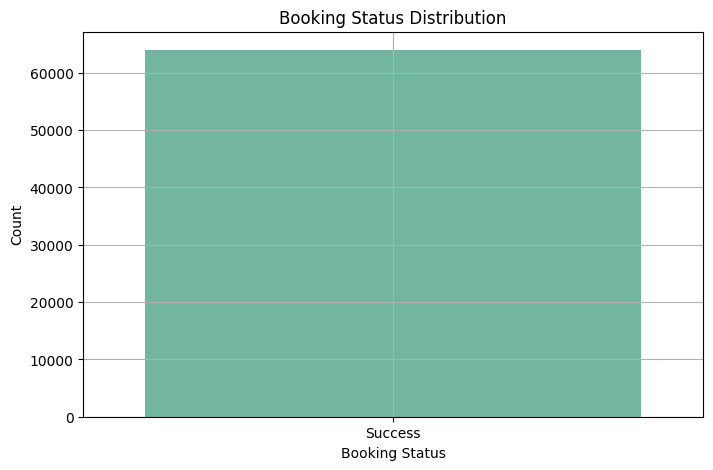

In [20]:
# --- 3. Booking Status Count (Completed vs Cancelled) ---
plt.figure(figsize=(8,5))
sns.countplot(x='booking_status', data=df, palette='Set2')
plt.title('Booking Status Distribution')
plt.xlabel('Booking Status')
plt.ylabel('Count')
plt.grid(True)
plt.show()


C:\Users\aksha\AppData\Local\Temp\ipykernel_24008\2518914591.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='vehicle_type', data=df, palette='coolwarm')


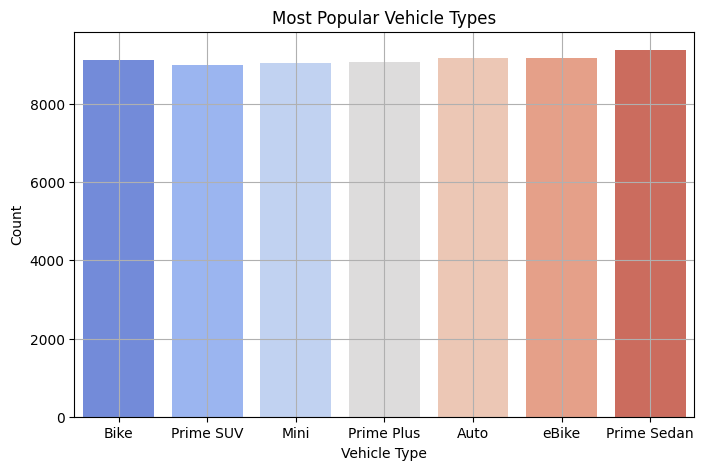

In [21]:
# --- 4. Vehicle Type Popularity ---
plt.figure(figsize=(8,5))
sns.countplot(x='vehicle_type', data=df, palette='coolwarm')
plt.title('Most Popular Vehicle Types')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.grid(True)
plt.show()

C:\Users\aksha\AppData\Local\Temp\ipykernel_24008\2958988544.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='payment_method', data=df, palette='pastel')


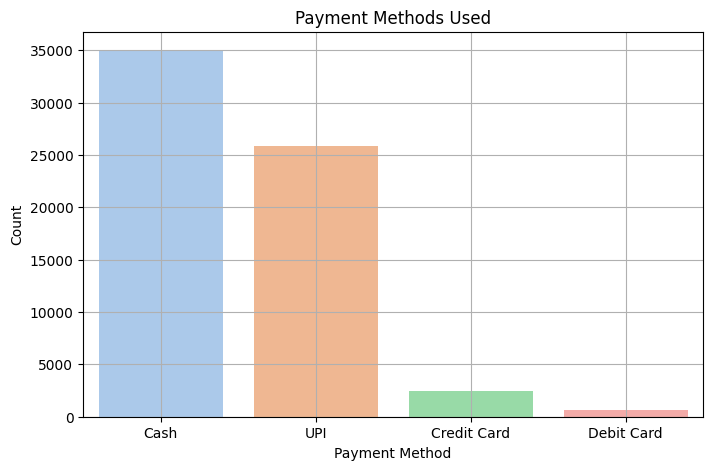

In [22]:
# --- 5. Payment Method Distribution ---
plt.figure(figsize=(8,5))
sns.countplot(x='payment_method', data=df, palette='pastel')
plt.title('Payment Methods Used')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.grid(True)
plt.show()

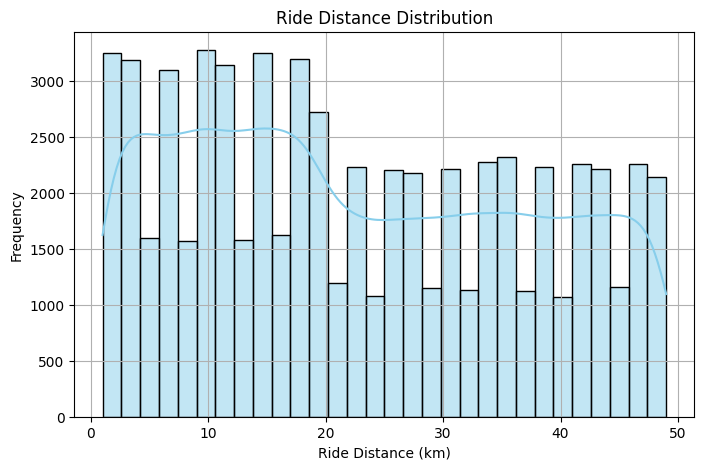

In [23]:
# --- 6. Ride Distance Distribution ---
plt.figure(figsize=(8,5))
sns.histplot(df['ride_distance'], bins=30, kde=True, color='skyblue')
plt.title('Ride Distance Distribution')
plt.xlabel('Ride Distance (km)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

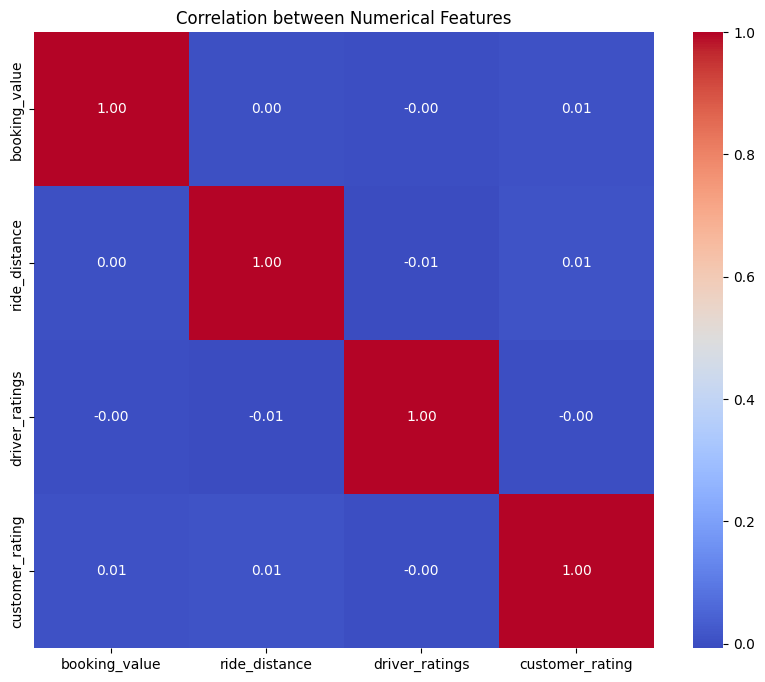

In [24]:
# --- 7. Correlation Heatmap (Numerical Features) ---
plt.figure(figsize=(10,8))
numerical_features = ['booking_value', 'ride_distance', 'driver_ratings', 'customer_rating']
corr = df[numerical_features].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Numerical Features')
plt.show()

In [25]:
# Save clean dataset to a CSV file for Power BI
df.to_csv('cleaned_booking_data.csv', index=False)
print("Cleaned data saved as 'cleaned_booking_data.csv' ✅")

Cleaned data saved as 'cleaned_booking_data.csv' ✅
